In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
breast_cancer = load_breast_cancer()

In [50]:
breast_cancer_std = StandardScaler().fit_transform(breast_cancer.data) #정규분포

pca = PCA(n_components=2)       #2차원
breast_cancer_pca = pca.fit_transform(breast_cancer_std)

In [51]:
df = pd.DataFrame(breast_cancer_pca, columns= ['PC1','PC2']) #2차원 정규분포 한것을
                                        #데이터 프레임 및 컬럼생성
df['target'] = breast_cancer.target          #타겟 설정  (2개)
df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

In [69]:
pca5 = PCA(n_components=5)      
breast_cancer_pca5 = pca5.fit_transform(breast_cancer_std)
df5 = pd.DataFrame(breast_cancer_pca5, columns= ['PC1','PC2','PC3','PC4','PC5'])
df5['target'] = breast_cancer.target


In [70]:
pca10 = PCA(n_components=10)      
breast_cancer_pca10 = pca10.fit_transform(breast_cancer_std)
df10 = pd.DataFrame(breast_cancer_pca10, columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
df10['target'] = breast_cancer.target


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, stratify=breast_cancer.target, random_state=2021
)
rfc= RandomForestClassifier(random_state=2021)
rfc.fit(X_train,y_train)
rfc.score(X_test, y_test)

0.9790209790209791

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_pca, breast_cancer.target, stratify=breast_cancer.target, random_state=2021
)
rfc2= RandomForestClassifier(random_state=2021)
rfc2.fit(X_train,y_train)
rfc2.score(X_test, y_test)

0.9440559440559441

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_pca5, breast_cancer.target, stratify=breast_cancer.target, random_state=2021
)
rfc5= RandomForestClassifier(random_state=2021)
rfc5.fit(X_train,y_train)
rfc5.score(X_test, y_test)

0.965034965034965

In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_pca10, breast_cancer.target, stratify=breast_cancer.target, random_state=2021
)
rfc10= RandomForestClassifier(random_state=2021)
rfc10.fit(X_train,y_train)
rfc10.score(X_test, y_test)

0.972027972027972

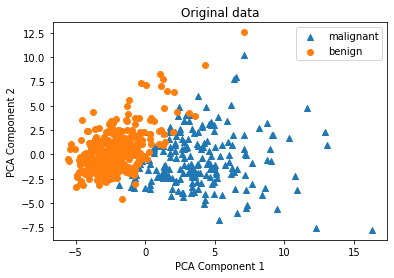

In [59]:
markers = ['^','o']
for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
    label = breast_cancer.target_names[i])
plt.legend()
plt.title('Original data')
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.show()

In [60]:
from sklearn.cluster import KMeans      
kmeans = KMeans(n_clusters = 2, random_state=2021)

In [61]:
kmeans.fit(breast_cancer_std)

KMeans(n_clusters=2, random_state=2021)

In [62]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [63]:
df['cluster'] = kmeans.labels_
df.tail()

,PC1,PC2,target,cluster
564,6.439315,-3.576817,0,0
565,3.793382,-3.584048,0,0
566,1.256179,-1.902297,0,0
567,10.374794,1.672010,0,0
568,-5.475243,-0.670637,1,1


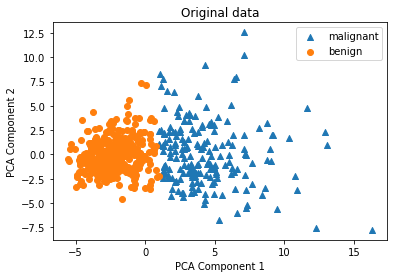

In [64]:
markers = ['^','o']
for i, marker in enumerate(markers):
    x_axis_data = df[df.cluster == i]['PC1']
    y_axis_data = df[df.cluster == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
    label = breast_cancer.target_names[i])
plt.legend()
plt.title('Original data')
plt.xlabel('PCA Component 1'); plt.ylabel('PCA Component 2')
plt.show()

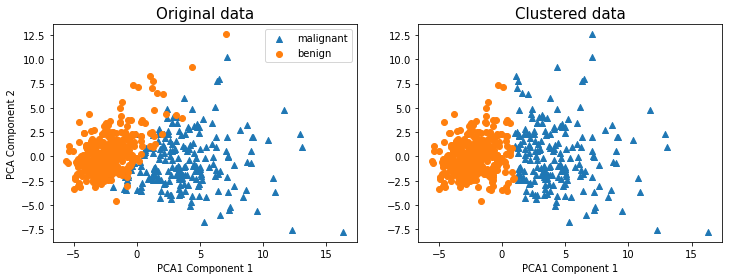

In [72]:
markers = ['^','o']
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4))
for k, column in enumerate(['target','cluster']):
    ax=axs[k]
    for i, marker in enumerate(markers):
        x_axis_data = df[df[column] == i]['PC1']
        y_axis_data = df[df[column] == i]['PC2']
        ax.scatter(x_axis_data, y_axis_data, marker=marker, label = breast_cancer.target_names[i])
    if k==0:            #Original
        ax.set_title('Original data', fontsize=15)
        ax.set_ylabel('PCA Component 2')
        ax.legend()
    else:
        ax.set_title('Clustered data', fontsize=15)
    ax.set_xlabel('PCA1 Component 1')
    
plt.show()

In [66]:
from sklearn.metrics import silhouette_score, silhouette_samples

score_samples = silhouette_samples(breast_cancer_std, df.cluster)
df['실루엣 계수'] = score_samples
df.head()

,PC1,PC2,target,cluster,실루엣 계수
0,9.192837,1.948583,0,0,0.296634
1,2.387802,-3.768172,0,0,0.041947
2,5.733896,-1.075174,0,0,0.341336
3,7.122953,10.275589,0,0,0.143625
4,3.935302,-1.948072,0,0,0.166490


In [67]:
df['실루엣 계수'].mean()

0.3433822406907782

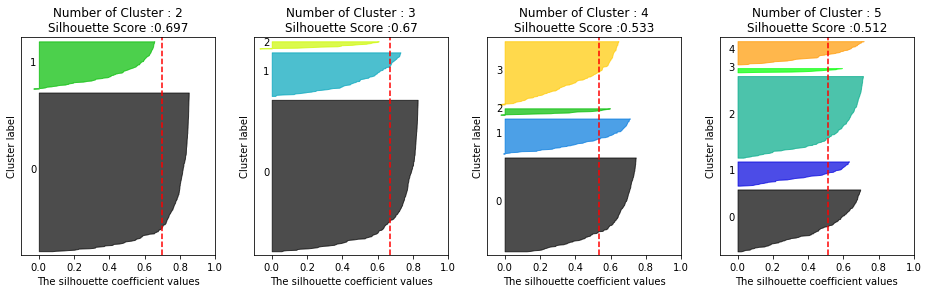

In [68]:
from visualize import visualize_silhouette
visualize_silhouette([2,3,4,5], breast_cancer.data)